In [48]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [49]:
#  Import and read the charity_data.csv.
import pandas as pd
retail_df = pd.read_csv(r"C:\Users\jariv\Project4\online_retail.csv")
retail_df.head()

C:\Users\jariv\AppData\Local\Temp\ipykernel_22064\1313707847.py:3: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom


<Axes: xlabel='count', ylabel='Country'>

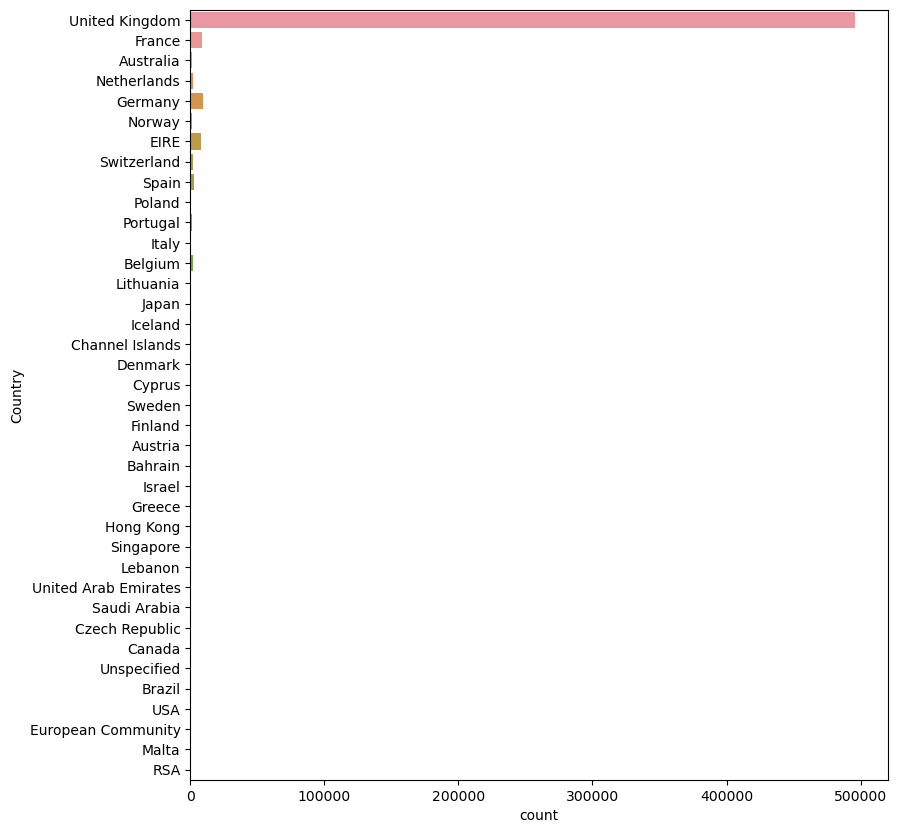

In [50]:
# Make figsize
plt.figure(figsize=(9,10))

# Bar plot by country
sns.countplot(y='Country', data=retail_df)

In [51]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail_df.isnull().sum())/len(retail_df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [52]:
# Droping rows having missing values

retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [53]:
# Drop rows with "POST" in the StockCode column
retail_df = retail_df[retail_df['StockCode'] != 'POST']

# Drop rows where InvoiceNo column starts with "C"
retail_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.startswith('C')]

In [54]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [55]:
from datetime import date
retail_df['CustomerID'] = retail_df['CustomerID'].astype(str)

# Convert 'InvoiceDate' column to datetime data type
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Verify the data types of the DataFrame
retail_df.info()

C:\Users\jariv\AppData\Local\Temp\ipykernel_22064\185447101.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<class 'pandas.core.frame.DataFrame'>
Index: 396825 entries, 0 to 532617
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396825 non-null  object        
 1   StockCode    396825 non-null  object        
 2   Description  396825 non-null  object        
 3   Quantity     396825 non-null  int64         
 4   InvoiceDate  396825 non-null  datetime64[ns]
 5   UnitPrice    396825 non-null  float64       
 6   CustomerID   396825 non-null  object        
 7   Country      396825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.2+ MB


In [56]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format = '%m/%d/%Y %H:%M')

<Axes: xlabel='Frequency', ylabel='Description'>

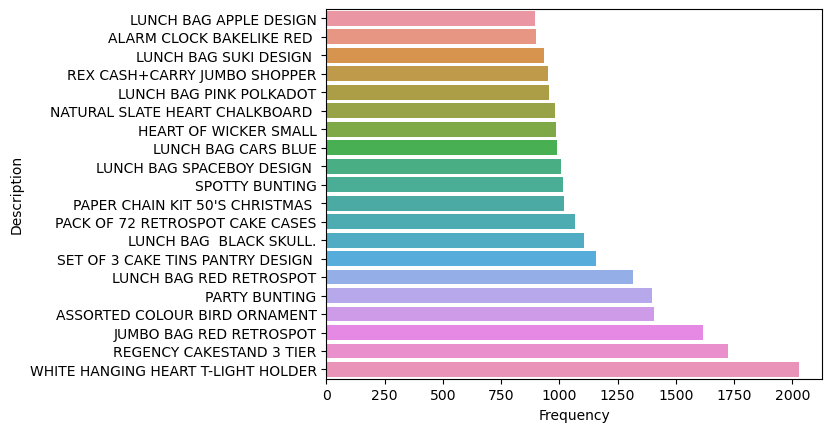

In [57]:
# Get the top 25 most frequent descriptions
top_20_descriptions = retail_df['Description'].value_counts().index[:20]

# Filter the DataFrame to include only rows with descriptions in the top 25
top_20_df = retail_df[retail_df['Description'].isin(top_20_descriptions)]

# Sort the DataFrame by description frequency in ascending order
top_20_df = top_20_df.groupby('Description').size().reset_index(name='Frequency')
top_20_df = top_20_df.sort_values(by='Frequency')

# Bar plot of the top 25 most frequent descriptions in ascending order
sns.barplot(y='Description', x='Frequency', data=top_20_df)

In [58]:
# Get the top 20 most frequent descriptions
top_20_descriptions = retail_df['Description'].value_counts().nlargest(20).index

# Filter the DataFrame to include only rows with descriptions in the top 20
top_20_df = retail_df[retail_df['Description'].isin(top_20_descriptions)]

# Count occurrences of each description
description_counts = top_20_df['Description'].value_counts()

# Create DataFrame with frequencies
top_20_df = description_counts.reset_index()
top_20_df.columns = ['Description', 'Frequency']

# Sort the DataFrame by frequency
top_20_df = top_20_df.sort_values(by='Frequency')

# Create an interactive bar plot with Plotly
fig = px.bar(top_20_df, x='Frequency', y='Description', orientation='h', title='Top 20 Most Frequent Descriptions')
fig.update_layout(xaxis_title='Frequency', yaxis_title='Description')
fig.show()

In [59]:
# Get the top 25 most frequent item descriptions
top_20_descriptions = retail_df['Description'].value_counts().nlargest(20).index

# Filter the DataFrame to include only rows with the top 25 descriptions
top_20_df = retail_df[retail_df['Description'].isin(top_20_descriptions)]

# Extract month from InvoiceDate
top_20_df['Month'] = top_20_df['InvoiceDate'].dt.month

# Group by month and item description, then sum up 'TotalPrice' for each month
monthly_sales = top_20_df.groupby(['Month', 'Description'])['TotalPrice'].sum().reset_index()

# Plot the sales of top 25 item descriptions based on months
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TotalPrice', hue='Description', data=monthly_sales)
plt.title('Monthly Sales of Top 20 Item Descriptions')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(range(1, 13))  # Set the x-axis ticks to show all months
plt.grid(True)
plt.show()

C:\Users\jariv\AppData\Local\Temp\ipykernel_22064\827016311.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: 'Column not found: TotalPrice'

In [60]:
import plotly.express as px

# Get the top 25 most frequent item descriptions
top_20_descriptions = retail_df['Description'].value_counts().nlargest(20).index

# Filter the DataFrame to include only rows with the top 25 descriptions
top_20_df = retail_df[retail_df['Description'].isin(top_20_descriptions)]

# Extract month from InvoiceDate
top_20_df['Month'] = top_20_df['InvoiceDate'].dt.month

# Group by month and item description, then sum up 'Quantity' for each month
monthly_quantity = top_20_df.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

# Create an interactive line plot using Plotly
fig = px.line(monthly_quantity, x='Month', y='Quantity', color='Description', title='Monthly Quantity of Top 20 Item Descriptions')
fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='Quantity'),
    legend_title='Description'
)
fig.show()

C:\Users\jariv\AppData\Local\Temp\ipykernel_22064\1977119150.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def define_model(input_shape):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=input_shape))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification
    
    return model

# Define your features (X) and target variable (y)
X = top_20_df[['Quantity', 'InvoiceNo', 'StockCode']]
y = top_20_df['UnitPrice']
# Assuming your input shape is (num_features,)
input_shape = (X.shape[1],)
model = define_model(input_shape)

c:\Users\jariv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



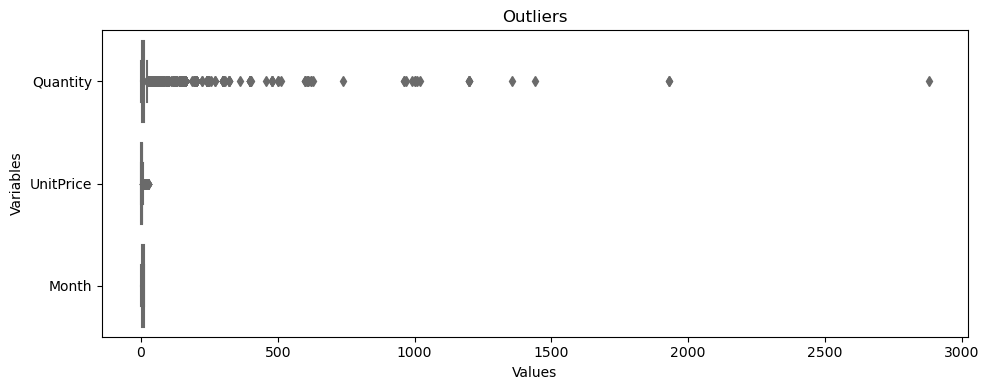

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
new_df = top_20_df.drop(columns = ['CustomerID'])
sns.boxplot(data=new_df, orient='h', palette='Set3')
plt.title('Outliers', fontsize=12)
plt.xlabel('Values')
plt.ylabel('Variables')
plt.tight_layout()
plt.show();

c:\Users\jariv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jariv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Error in callback <function _draw_all_if_interactive at 0x000001D3D9B3E8E0> (for post_execute):


KeyboardInterrupt: 

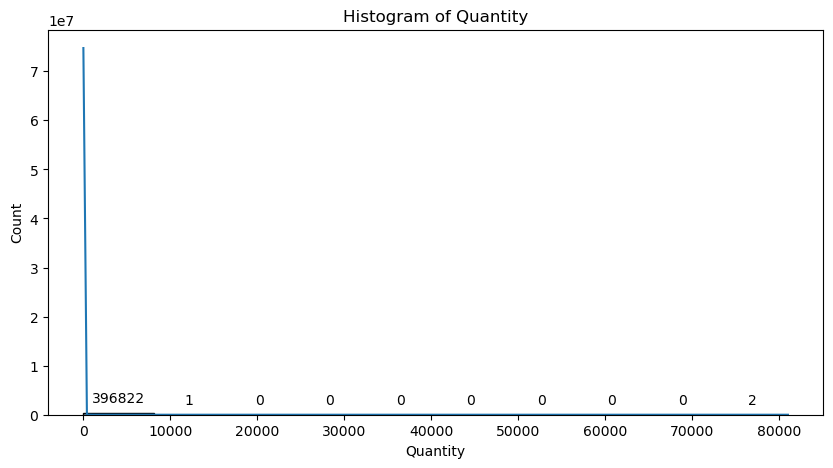

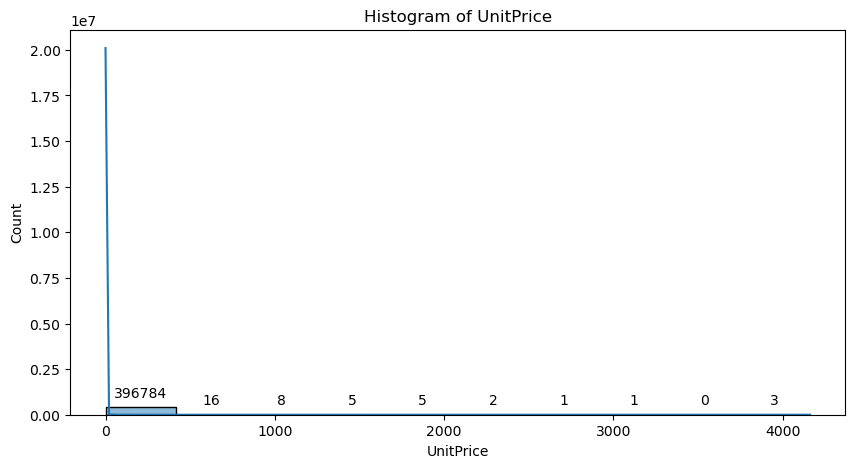

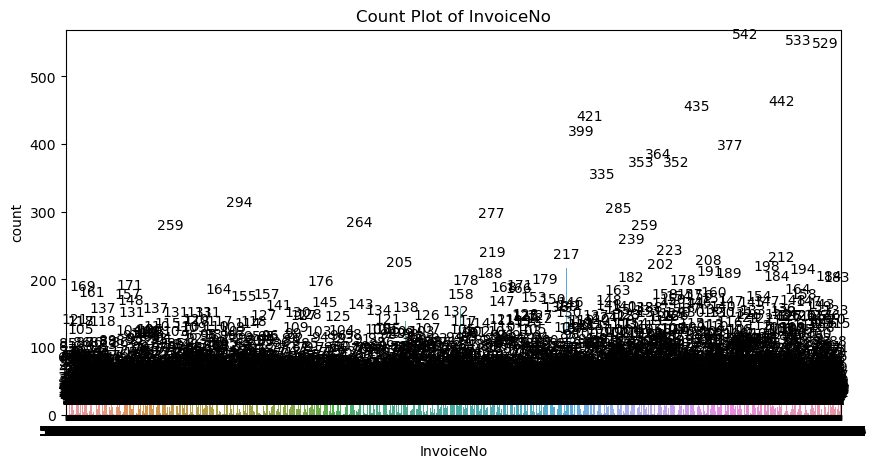

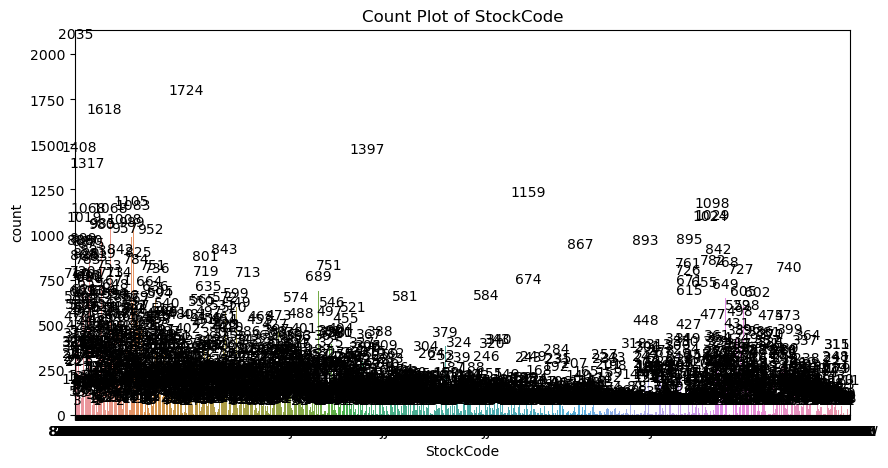

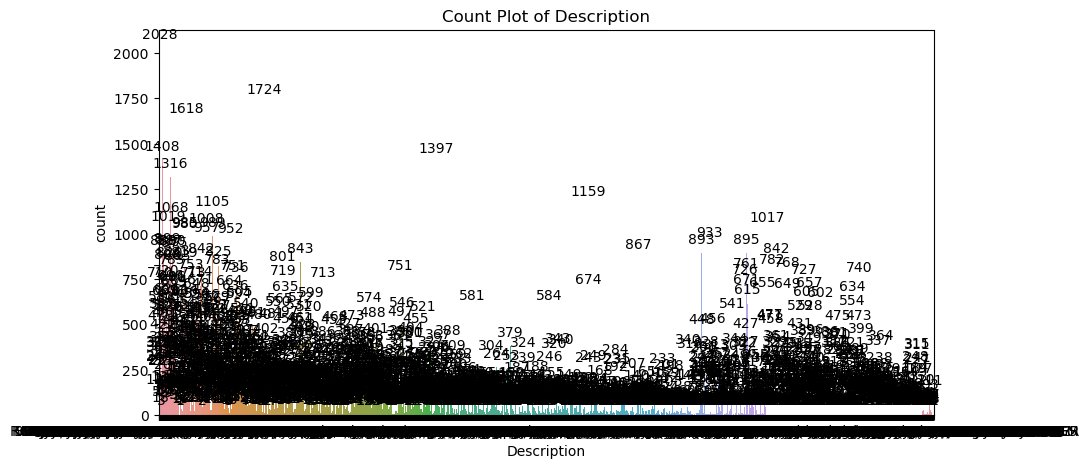

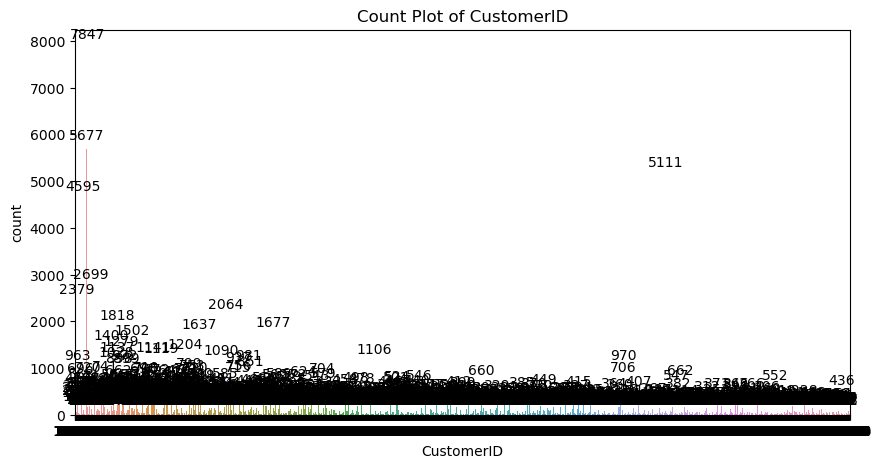

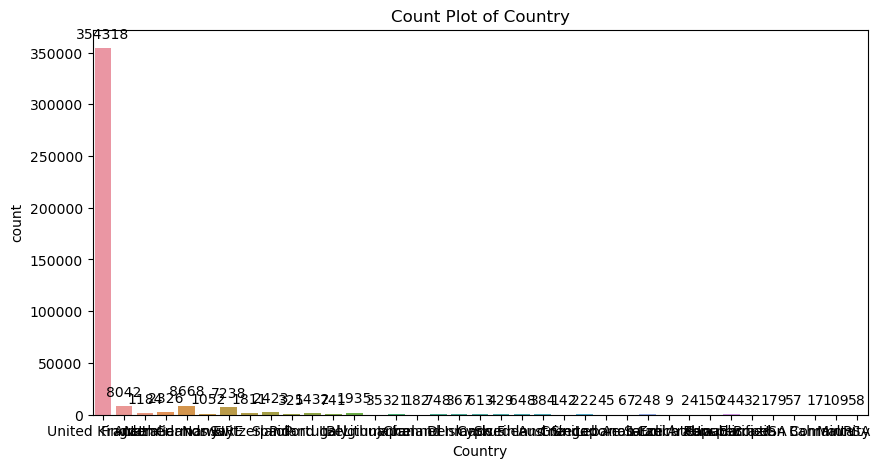

In [63]:
for col in retail_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=retail_df, x=col, bins=10, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Annotating histograms with counts
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

# Plot count plots for object columns
for col in retail_df.select_dtypes(include=['object']).columns:
    plt.figure( figsize=(10, 5))
    sns.countplot(data=retail_df, x=col)
    plt.title(f'Count Plot of {col}')
    
    # Annotating count plots with counts
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

In [64]:
# Perform one-hot encoding for the 'StockCode' column
retail_df_encoded = pd.get_dummies(retail_df, columns=['StockCode'], prefix='StockCode')

In [65]:
# Convert 'InvoiceDate' column to datetime format if it's not already
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Extract month from 'InvoiceDate' and create a new column
retail_df['InvoiceMonth'] = retail_df['InvoiceDate'].dt.month

# Display the DataFrame with the new 'InvoiceMonth' column
print(retail_df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
1    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
2    536365     71053                  WHITE METAL LANTERN         6   
3    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
4    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   

          InvoiceDate  UnitPrice CustomerID         Country  InvoiceMonth  
0 2010-12-01 08:26:00       4.25      17850  United Kingdom            12  
1 2010-12-01 08:26:00       7.65      17850  United Kingdom            12  
2 2010-12-01 08:26:00       3.39      17850  United Kingdom            12  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom            12  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom            12  


In [66]:
retail_df.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID              object
Country                 object
InvoiceMonth             int32
dtype: object

In [69]:
# Assuming 'df' is your DataFrame and 'InvoiceMonth' is the column with month values
df_encoded = pd.get_dummies(retail_df, columns=['InvoiceMonth'], prefix='Month')

# This will create binary columns for each month value in 'InvoiceMonth'

In [70]:
# Drop the binary column for December (which corresponds to the value 12)
df_encoded = df_encoded.drop('Month_12', axis=1)

In [71]:
df_encoded = df_encoded[df_encoded['Month'] != 12]

KeyError: 'Month'

In [ ]:
# Drop the binary column for December
df_encoded = df_encoded.drop(12, axis=1)

In [ ]:
df_encoded.columns

In [ ]:
# Select features and target variable
X = retail_df[['CustomerID', 'TotalPrice']]  # Features: CustomerID, TotalPrice
y = retail_df['Quantity']  # Target variable: Quantity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [ ]:
# Select features and target variable
X = df_encoded[['CustomerID', 'Quantity']]  # Features: CustomerID, TotalPrice
y = df_encoded['Month']  # Target variable: Quantity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [ ]:
# Get the top 20 most frequent stock codes
top_20_stock_codes = df_encoded['StockCode'].value_counts().head(20).index

# Filter the DataFrame to include only rows with the top 20 stock codes
df_top_20 = df_encoded[df_encoded['StockCode'].isin(top_20_stock_codes)]

# Select features and target variable
X = df_top_20[['CustomerID', 'Quantity']]  # Features
y = df_top_20['Month']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [ ]:
# Select features and target variable
X = df_encoded[['UnitPrice', 'Quantity']]  # Features: CustomerID, TotalPrice
y = df_encoded['Month']  # Target variable: Quantity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [ ]:
plt.figure(figsize=(14, 8))
top_products = retail_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)
top_products.plot(kind='bar', color='green')

plt.title('Top Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')

# Annotating data labels
for i, value in enumerate(top_products):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.show()

In [ ]:
df_encoded.dtypes

In [ ]:
df_encoded.tail()

In [ ]:

print(df_encoded['Month'].unique())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions to sample from
param_dist = {'n_neighbors': randint(1, 10), 'weights': ['uniform', 'distance']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=5, cv=5)

# Fit the RandomizedSearchCV object to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Create and fit a KNN model
knn = KNeighborsClassifier(n_neighbors=7)  # Define the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
df_encoded_new = pd.DataFrame(df_encoded, columns=['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'InvoiceSpan', 'Month', 'StockCode_encoded'])




In [ ]:
df_encoded_new2 = pd.DataFrame(df_encoded, columns=['StockCode', 'Quantity', 'UnitPrice', 'Country', 'Month'])


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_encoded_new2['Country'] = encoder.fit_transform(df_encoded_new2['Country'])
df_encoded_new2['StockCode'] = encoder.fit_transform(df_encoded_new2['StockCode'])
df_encoded_new2.head()

In [ ]:
# Scaling the dataset
scaler = StandardScaler()
newdata = df_encoded_new2.sample(n=5000)
X = newdata.values
X = scaler.fit_transform(X)
X

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

clusters = []

# testing from 1 to 10 cluster in order to know how many clusters are necessary for a better accuracy
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [ ]:
km5 = KMeans(n_clusters=5).fit(X)

newdata['Labels'] = km5.labels_

# ploting labels with Stockcode as y and Quantity as x
plt.figure(figsize=(6, 4))
sns.scatterplot(x=newdata['Quantity'], y=newdata['Month'], hue=newdata['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

In [ ]:
# Analyzing the dataset with labels as x and Quantity as y
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Quantity', data=newdata, ax=ax, hue=newdata['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Quantity')

# Analyzing the dataset with labels as x and StockCode as y
ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='StockCode', data=newdata, ax=ax, hue=newdata['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Stockcode')

plt.show()

In [ ]:
# Analyzing the dataset with labels as x and Country as y
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Month', data=newdata, ax=ax, hue=newdata['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Quantity')

# Analyzing the dataset with labels as x and UnitPrice as y
ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='UnitPrice', data=newdata, ax=ax, hue=newdata['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Stockcode')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = df_encoded[['Month','UnitPrice', ]]
y = df_encoded['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train individual models
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=50, random_state=42)
    
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions using individual models
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Ensemble predictions using averaging
ensemble_pred = (rf_pred + gb_pred) / 2

# Evaluate the ensemble model's performance
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print("Ensemble Model Mean Squared Error:", ensemble_mse)
print("Ensemble Model R^2 Score:", ensemble_r2)

In [ ]:
# Feature and target variables
X_train = train_data[['Month', 'UnitPrice', 'StockCode']]  # Features: Month, UnitPrice, StockCode
y_train = train_data['Quantity']  # Target: Sales quantity
X_test = test_data[['Month', 'UnitPrice', 'StockCode']]  # Features: Month, UnitPrice, StockCode
y_test = test_data['Quantity']  # Target: Sales quantity

# Model training (linear regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def define_model(input_shape):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=input_shape))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification
    
    return model

# Define your features (X) and target variable (y)
X = df_encoded[['Quantity', 'InvoiceNo_y', 'CustFrequency']]
y = df_encoded['TotalPrice']
# Assuming your input shape is (num_features,)
input_shape = (X.shape[1],)
model = define_model(input_shape)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
new_df = df_encoded.drop(columns = ['CustomerID'])
sns.boxplot(data=new_df, orient='h', palette='Set3')
plt.title('Outliers', fontsize=12)
plt.xlabel('Values')
plt.ylabel('Variables')
plt.tight_layout()
plt.show();

In [ ]:
# Assuming X_train is your training feature matrix
num_features = X_train.shape[1]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

In [ ]:
print(df_encoded.columns)

In [ ]:
df_encoded.head()

In [ ]:
# Data preprocessing and feature engineering
# Assuming retail_df is your DataFrame with columns: 'InvoiceDate', 'StockCode', 'Quantity'
# retail_df['InvoiceMonth'] = pd.to_datetime(retail_df['InvoiceMonth'])
# retail_df['InvoiceMonth'] = retail_df['InvoiceMonth'].dt.date
sales_per_date =df_encoded.groupby('Month')['Quantity'].sum().reset_index()

# Train-test split (preserve temporal order)
train_size = int(0.8 * len(sales_per_date))
train_data = sales_per_date[:train_size]
test_data = sales_per_date[train_size:]

# Feature and target variables
X_train = train_data[['Month', 'UnitPrice', 'StockCode_encoded']]  # Features: Date
y_train = train_data['Quantity']  # Target: Sales quantity
X_test = test_data[['Month', 'UnitPrice', 'StockCode_encoded']]  # Features: Date
y_test = test_data['Quantity']  # Target: Sales quantity

# Model training (linear regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Prediction (for future dates)
# future_dates = pd.date_range(start='2024-01-01', end='2024-12-31')
# future_dates_df = pd.DataFrame({'InvoiceMonth': future_dates})
# future_predictions = model.predict(future_dates_df[['InvoiceMonth']])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'StockCode' and populate 'StockCode_encoded' column
retail_df['StockCode_encoded'] = label_encoder.fit_transform(retail_df['StockCode'])

# Verify the encoding
print(retail_df[['StockCode', 'StockCode_encoded']].head())

In [ ]:
print(X_train.shape)
print(y_test)

In [ ]:
print(X_train)
print(y_test)

In [ ]:
p

In [ ]:
# Determine the frequency of CustomerID
customer_frequency = retail_df['CustomerID'].value_counts()

# Display the frequency
print(customer_frequency)

In [ ]:
# Create a new DataFrame from the frequency Series
customer_frequency_df = pd.DataFrame(customer_frequency)
customer_frequency_df.reset_index(inplace=True)
customer_frequency_df.columns = ['CustomerID', 'CustFrequency']

# Display the new DataFrame
print(customer_frequency_df.head())

In [ ]:
# count the number of unique invoice numbers for each customer
Invoicefrequency = retail_df.groupby('CustomerID')['InvoiceNo'].nunique()
Invoicefrequency


In [ ]:

# Group by CustomerID and InvoiceNo, then count the occurrences of each combination
invoice_frequency = retail_df.groupby(['CustomerID', 'InvoiceNo']).size().reset_index(name='InvoiceFrequency')

# Display the DataFrame
print(invoice_frequency[['CustomerID', 'InvoiceNo', 'InvoiceFrequency']])

In [ ]:
Invoicefrequency_df = pd.DataFrame(Invoicefrequency)
Invoicefrequency_df.reset_index(inplace=True)
Invoicefrequency_df.columns = ['CustomerID', 'InvoiceFrequency']
Invoicefrequency_df.head()

In [ ]:
Invoicefrequency_df.columns

In [ ]:
# Split data into features (X) and target variable (y)
X = Invoicefrequency_df.drop(['InvoiceNo'], axis=1)
y = Invoicefrequency_df['InvoiceNo']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [ ]:
# count the number of unique invoice numbers for each customer
StockCodefreq = retail_df['CustomerID'].value_counts()


In [ ]:
StockCodefreq_df = pd.DataFrame(StockCodefreq)
StockCodefreq_df.reset_index(inplace=True)
StockCodefreq_df.columns = ['CustomerID', 'StockCodeFreq']
StockCodefreq_df.head()

In [72]:
#add new column Total Price
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,12,25.50
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,12,15.30
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34


In [73]:
RFM_df = pd.read_csv(r"C:\Users\jariv\Project4\RFM.csv")
RFM_df.head()

,CustomerID,Frequency,MonetaryValue,UnitPrice,Quantity,Recency,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,12346,1,77183.60,1.040000,74215.000000,325,1,1,2,4,Low-Value,At Risk
1,12347,182,4310.00,2.644011,13.505495,366,1,1,1,3,Low-Value,Gone
2,12348,27,1437.24,0.692963,86.370370,357,1,1,1,3,Low-Value,Gone
3,12349,72,1457.55,4.237500,8.750000,18,5,1,1,7,High-Value,Loyal Customers
4,12350,16,294.40,1.581250,12.250000,309,1,1,1,3,Low-Value,Gone


In [74]:
RFM_df['CustomerID'] = RFM_df['CustomerID'].astype(str)

In [75]:
RFM_merged_df = pd.merge(retail_df, RFM_df, on=['CustomerID'], how='inner')
RFM_merged_df.head()

,InvoiceNo,StockCode,Description,Quantity_x,InvoiceDate,UnitPrice_x,CustomerID,Country,InvoiceMonth,TotalPrice,...,MonetaryValue,UnitPrice_y,Quantity_y,Recency,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,12,25.50,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,12,15.30,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone


In [77]:
RFM_merged_df.shape

(396825, 21)

In [79]:
RFM_score_df = RFM_merged_df[['StockCode', 'Quantity_x', 'UnitPrice_x', 'CustomerID', 'Country', 'InvoiceMonth', 'TotalPrice', 'RFM_Score']]
RFM_score_df.head()

,StockCode,Quantity_x,UnitPrice_x,CustomerID,Country,InvoiceMonth,TotalPrice,RFM_Score
0,21730,6,4.25,17850,United Kingdom,12,25.50,3
1,22752,2,7.65,17850,United Kingdom,12,15.30,3
2,71053,6,3.39,17850,United Kingdom,12,20.34,3
3,84029E,6,3.39,17850,United Kingdom,12,20.34,3
4,84029G,6,3.39,17850,United Kingdom,12,20.34,3


In [ ]:
# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['CustomerID', 'StockCode', 'Description'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display unique values in the 'StockCode' column
print(retail_df['StockCode'].unique())

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode StockCode as categorical variable
retail_df['StockCode_encoded'] = label_encoder.fit_transform(retail_df['StockCode'].astype(str))

# Split data into features (X) and target variable (y)
X = retail_df.drop(['Quantity'], axis=1)  # Assuming 'Quantity' is the target variable
y = retail_df['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [ ]:
#Calculate the total purchase amount for each customer
total_purchase_amount = retail_df['TotalPrice'].value_counts()
total_purchase_amount_df = pd.DataFrame(total_purchase_amount)
total_purchase_amount_df.reset_index(inplace=True)
total_purchase_amount_df.columns = ['CustomerID', 'TotalPrice']

In [ ]:
max_purchase_date = retail_df['InvoiceDate'].value_counts()
max_purchase_date_df = pd.DataFrame(max_purchase_date).reset_index()
max_purchase_date_df

In [ ]:

invoice_df = retail_df[['CustomerID', 'InvoiceDate']].copy()

# Convert 'InvoiceDate' to datetime format
invoice_df['InvoiceDate'] = pd.to_datetime(invoice_df['InvoiceDate'])

# Extract date part from 'InvoiceDate'
invoice_df['date'] = invoice_df['InvoiceDate'].dt.date

# Filter the DataFrame for a specific customer ID
customer_id = '15311.0'
filtered_invoice_df = invoice_df.loc[invoice_df['CustomerID'] == customer_id].drop_duplicates(subset=['date'])

# Print the filtered DataFrame
print(filtered_invoice_df)

In [ ]:
# Convert 'InvoiceDate' to datetime format if it's not already in datetime format
filtered_invoice_df['InvoiceDate'] = pd.to_datetime(filtered_invoice_df['InvoiceDate'])

# Sort the DataFrame by 'InvoiceDate' to ensure correct ordering
filtered_invoice_df = filtered_invoice_df.sort_values(by='InvoiceDate')

# Calculate the difference in days between consecutive invoices
invoice_spans = filtered_invoice_df['InvoiceDate'].diff().dt.days.dropna()

# Calculate the average number of days between consecutive invoices
average_invoice_span = invoice_spans.mean()

# Print the result
print("Average number of days between consecutive invoices:", average_invoice_span)

In [ ]:
# Convert 'InvoiceDate' to datetime format if it's not already in datetime format
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Sort the DataFrame by 'CustomerID' and 'InvoiceDate' to ensure correct ordering
retail_df = retail_df.sort_values(by=['CustomerID', 'InvoiceDate'])

# Calculate the difference in days between consecutive invoices
retail_df['InvoiceSpan'] = retail_df.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# Calculate the average number of days between consecutive invoices for each customer
average_invoice_span_per_customer = retail_df.groupby('CustomerID')['InvoiceSpan'].mean()

# Replace null values in 'InvoiceSpan' with -1
retail_df['InvoiceSpan'] = retail_df['InvoiceSpan'].fillna(-1)

# Drop rows with null values in 'InvoiceSpan'
#retail_df = retail_df.dropna(subset=['InvoiceSpan'])

# Print the result
print(average_invoice_span_per_customer)

In [ ]:
# Extract necessary columns
customer_invoice_dates = retail_df[['CustomerID', 'InvoiceDate']].copy()
# Find the last transaction date in the dataset
last_transaction_date = retail_df['InvoiceDate'].max()

# Filter customer_invoice_dates to consider only transactions up to the last transaction date
customer_invoice_dates_filtered = customer_invoice_dates[customer_invoice_dates['InvoiceDate'] <= last_transaction_date]

# Find the latest invoice date for each customer considering only transactions up to the last transaction date
latest_invoice_date = customer_invoice_dates_filtered.groupby('CustomerID')['InvoiceDate'].max()

# Calculate recency as the difference between the latest invoice date and the last transaction date
recency = last_transaction_date - latest_invoice_date

# Create a new DataFrame for recency
recency_df = pd.DataFrame({'CustomerID': recency.index, 'Recency': recency.dt.days})

# Change dtype of CustomerID from float to string
recency_df['CustomerID'] = recency_df['CustomerID'].astype(str)

# Display the new DataFrame
print(recency_df.head())

In [ ]:
# Add the average_invoice_span_per_customer values as a new column to the recency_df DataFrame
recency_df['average_invoice_span_per_customer'] = average_invoice_span_per_customer.values

# Display the updated recency_df DataFrame with the new column
print(recency_df.head())

In [ ]:
# Concatenate DataFrames instead of merging if 'CustomerID' is not meant for merging
clean_merged_df = pd.concat([customer_frequency_df, Invoicefrequency_df, StockCodefreq_df, total_purchase_amount_df, filtered_invoice_df, recency_df], axis=1)

# Display the concatenated DataFrame
print(clean_merged_df.head())

In [ ]:
import seaborn as sns

# Get the top 50 StockCodeFreq values
top_25_stock_code_freq = clean_merged_df['StockCodeFreq'].value_counts().nlargest(25).index

# Filter the DataFrame to include only rows with StockCodeFreq in the top 50
top_25_df = clean_merged_df[clean_merged_df['StockCodeFreq'].isin(top_25_stock_code_freq)]

# Bar plot of the top 50 StockCodeFreq values
sns.countplot(y='StockCodeFreq', data=top_25_df)

In [ ]:
# Make figsize
plt.figure(figsize=(9,10))

# Bar plot by country
sns.countplot(y='StockCodeFreq', data=clean_merged_df)

In [ ]:
import matplotlib.pyplot as plt
import mplcursors

# Resample data to monthly frequency and sum up 'TotalPrice' for each month
monthly_total_price = clean_merged_df.resample('M', on='InvoiceDate')['TotalPrice'].sum()

# Plot the time series data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
line = plt.plot(monthly_total_price.index, monthly_total_price, color='blue', marker='o', linestyle='-')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.grid(True)

# Enable hover annotation
mplcursors.cursor(line, hover=True)

# Annotate each point with the total price
for i, price in enumerate(monthly_total_price):
    annotation = f"${price:.2f}"
    plt.annotate(annotation, xy=(monthly_total_price.index[i], price), fontsize=8, textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


In [ ]:
# Merge customer_frequency_df with Invoice_frequency_df
#clean_merged_df = pd.merge(customer_frequency_df, Invoicefrequency_df, on='CustomerID', how='left')
clean_merged_df = pd.merge(Invoicefrequency_df, on='CustomerID', how='left')
# Merge StockCode_freq_df with the merged DataFrame
clean_merged_df = pd.merge(clean_merged_df, StockCodefreq_df, on='CustomerID', how='left')

# Merge total_purchase_amount_df with the merged DataFrame
#clean_merged_df = pd.merge(clean_merged_df, total_purchase_amount_df, on='CustomerID', how='left')

# Merge max_purchase_date_df with the merged DataFrame
clean_merged_df = pd.merge(clean_merged_df, filtered_invoice_df, on='CustomerID', how='left')

# Merge recency_df with the merged DataFrame
clean_merged_df = pd.merge(clean_merged_df, recency_df, on='CustomerID', how='left')
# Display the merged dataframe
print(retail_df.head())

In [ ]:
# Merge customer_frequency with invoice_frequency on 'CustomerID'
merged_ferquency_df = customer_frequency.merge(Invoicefrequency_df, on='CustomerID', how='inner')

# Merge the result with StockCode_freq on 'CustomerID'
merged_frequency_df = merged_ferquency_df.merge(StockCodefreq_df, on='CustomerID', how='inner')

# Merge the result with totalpurchase_amount on 'CustomerID'
merged_frequency_df = merged_ferquency_df.merge(total_purchase_amount_df, on='CustomerID', how='inner')

# Merge the result with filtered_invoice_date on 'CustomerID'
merged_frequency_df = merged_ferquency_df.merge(filtered_invoice_df, on='CustomerID', how='inner')

# Merge the result with recency on 'CustomerID'
merged_ferquency_df = merged_ferquency_df.merge(recency_df, on='CustomerID', how='inner')

# Display the final merged DataFrame
print(merged_ferquency_df.head())

In [ ]:
invoice_df = retail_df[['CustomerID', 'InvoiceDate']].copy()
invoice_df['date'] = invoice_df['InvoiceDate'].map(lambda x:str(x).split(' ')[0])
customerId = '15311.0'
filteredinvoice_df = invoice_df.loc[invoice_df['CustomerID']==customerId].drop_duplicates(subset=['date'])

filteredinvoice_df#.dtypes

In [ ]:
Invoicedatelist = filteredinvoice_df['InvoiceDate'].tolist()
invoicespans = []
previousdate = None

for i, d in enumerate(Invoicedatelist):
    if i > 0:
        invoicespans.append((d-previousdate).days)
    previousdate = d
sum(invoicespans)/len(invoicespans)    


In [ ]:
#determine the number of days since the customer's last purchase
max_purchase_date_df.columns = ['InvoiceDate', 'InvoiceDateFreq']
#max_purchase_date_df['DaysSinceLastPurchase'] = (pd.to_datetime('today') - max_purchase_date['InvoiceDate']).dt.days
max_purchase_date_df

In [ ]:
# Merge customer_frequency_df with Invoice_frequency_df
clean_merged_df = pd.merge(customer_frequency_df, Invoice_frequency_df, on='CustomerID', how='left')

# Merge StockCode_freq_df with the merged DataFrame
clean_merged_df = pd.merge(merged_df, StockCode_freq_df, on='CustomerID', how='left')

# Merge total_purchase_amount_df with the merged DataFrame
clean_merged_df = pd.merge(merged_df, total_purchase_amount_df, on='CustomerID', how='left')

# Merge max_purchase_date_df with the merged DataFrame
clean_merged_df = pd.merge(merged_df, max_purchase_date_df, on='CustomerID', how='left')
# Display the merged dataframe
print(retail_df.head())

In [ ]:
retail_df = pd.DataFrame(retail_df)

# Group the data by CustomerID and StockCode and count occurrences
grouped_df = retail_df.groupby(['CustomerID', 'StockCode']).size().reset_index(name='Frequency')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(grouped_df['Frequency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of CustomerID and StockCode Occurrences')
plt.xlabel('Frequency')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.show()

In [ ]:
for col in retail_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, bins=10, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Annotating histograms with counts
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

# Plot count plots for object columns
for col in retail_df.select_dtypes(include=['object']).columns:
    plt.figure( figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    
    # Annotating count plots with counts
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sample data into DataFrame
data = {
    'InvoiceNo': ['InvoiceNo'],
    'StockCode': ['StockCode'],
    'Description': ['Description'],
    'Quantity': ['Quantity'],
    'InvoiceDate': ['InvoiceDate'],
    'UnitPrice': ['UnitPrice'],
    'CustomerID': ['CustomerID'],
    'Country': ['Country']
}

df = pd.DataFrame(data)

# Group the data by CustomerID and StockCode and count occurrences
grouped_df = df.groupby(['CustomerID', 'StockCode']).size().reset_index(name='Frequency')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(grouped_df['Frequency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of CustomerID and StockCode Occurrences')
plt.xlabel('Frequency')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.show()